In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_selection import VarianceThreshold
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
customers=pandas.read_csv("./Mall_Customers.csv")

NameError: name 'pandas' is not defined

In [ ]:
# ANALISIS EXPLORATORIO
customers.head()

In [34]:
customers.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [35]:
customers.drop_duplicates(inplace=True)

<Axes: xlabel='Spending Score (1-100)'>

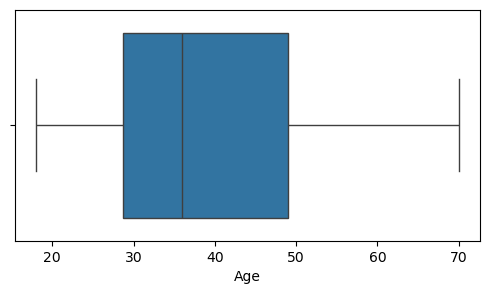

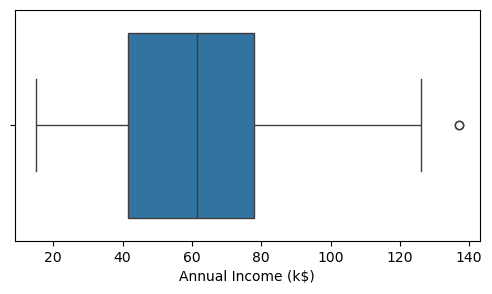

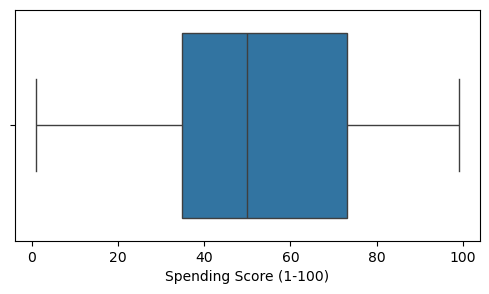

In [36]:
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=customers["Age"])
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=customers["Annual Income (k$)"])
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=customers["Spending Score (1-100)"])


In [37]:
#Tratamiento de los datos,
customers=customers[customers["Annual Income (k$)"]<=130]
customers = customers.drop(columns=["CustomerID"])


<Axes: xlabel='Spending Score (1-100)'>

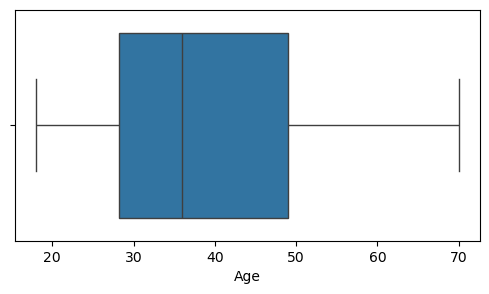

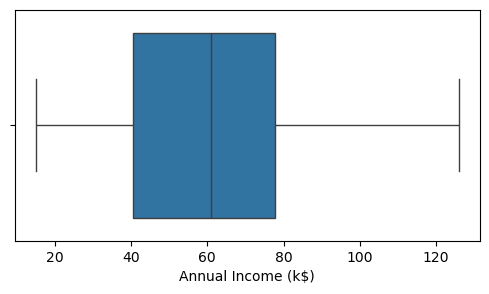

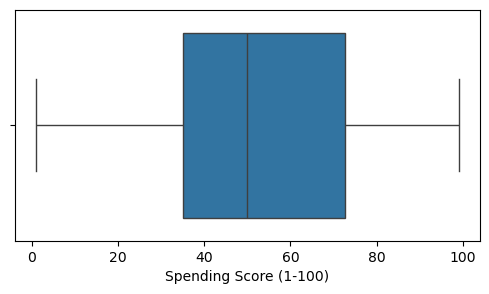

In [38]:
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=customers["Age"])
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=customers["Annual Income (k$)"])
pyplot.figure(figsize=(6,3))
seaborn.boxplot(x=customers["Spending Score (1-100)"])

<Axes: xlabel='Spending Score (1-100)', ylabel='Age'>

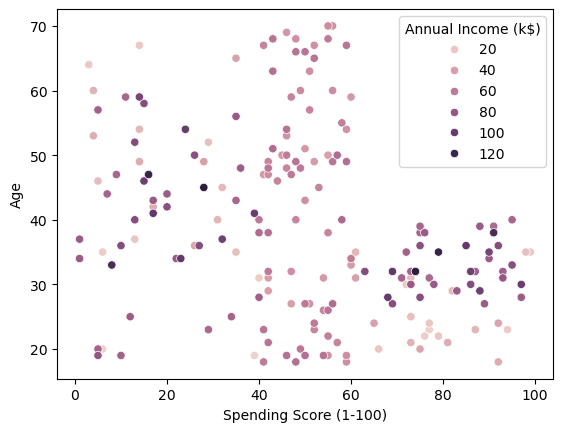

In [39]:
seaborn.scatterplot(x="Spending Score (1-100)" , y="Age" ,hue="Annual Income (k$)" , data=customers)

     Gender  Age  Annual Income (k$)  Spending Score (1-100)
0      Male   19                  15                      39
1      Male   21                  15                      81
2    Female   20                  16                       6
3    Female   23                  16                      77
4    Female   31                  17                      40
..      ...  ...                 ...                     ...
193  Female   38                 113                      91
194  Female   47                 120                      16
195  Female   35                 120                      79
196  Female   45                 126                      28
197    Male   32                 126                      74

[198 rows x 4 columns]


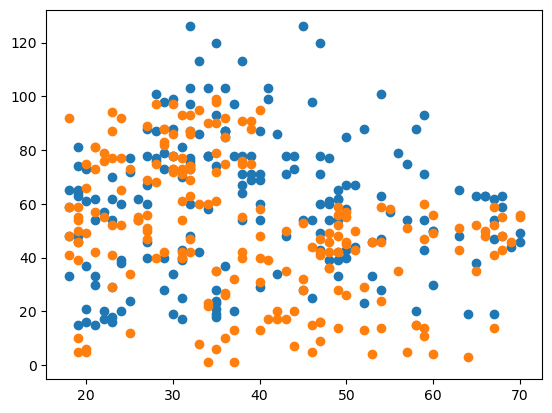

In [40]:
print(customers)
pyplot.scatter(customers['Age'],customers["Annual Income (k$)"]) #naranja
pyplot.scatter(customers['Age'],customers["Spending Score (1-100)"]) #azul

In [41]:
# Selección de características relevantes
selector = VarianceThreshold(threshold=0.01)
X_seleccionado = selector.fit_transform(X)

In [42]:
#Entrenamiento del modelo
def evaluar_modelo(X, etiquetas):
    sil = silhouette_score(X, etiquetas)
    ch = calinski_harabasz_score(X, etiquetas)
    return sil, ch

In [43]:
# calcular el numero de clusters optimo
puntuaciones_sil = []
puntuaciones_ch = []
rango_k = range(2, 11)
for k in rango_k:
    modelo = KMeans(n_clusters=k, random_state=42)
    etiquetas = modelo.fit_predict(X_seleccionado)
    sil, ch = evaluar_modelo(X_seleccionado, etiquetas)
    puntuaciones_sil.append(sil)
    puntuaciones_ch.append(ch)

k_optimo = rango_k[puntuaciones_sil.index(max(puntuaciones_sil))]
print(f"Mejor K por Silhouette: {k_optimo}")

kmeans = KMeans(n_clusters=k_optimo, random_state=42)
etiquetas_kmeans = kmeans.fit_predict(X_seleccionado)

agglo = AgglomerativeClustering(n_clusters=k_optimo)
etiquetas_agglo = agglo.fit_predict(X_seleccionado)

Mejor K por Silhouette: 6


In [44]:
#Desempeño del modelo
print("\nEvaluación K-Means:")
print("Silhouette Score:", silhouette_score(X_seleccionado, etiquetas_kmeans))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_seleccionado, etiquetas_kmeans))

print("\nEvaluación Jerárquico:")
print("Silhouette Score:", silhouette_score(X_seleccionado, etiquetas_agglo))
print("Calinski-Harabasz Index:", calinski_harabasz_score(X_seleccionado, etiquetas_agglo))




Evaluación K-Means:
Silhouette Score: 0.356485834425401
Calinski-Harabasz Index: 99.65487851108833

Evaluación Jerárquico:
Silhouette Score: 0.3504439354681972
Calinski-Harabasz Index: 95.2576612909977


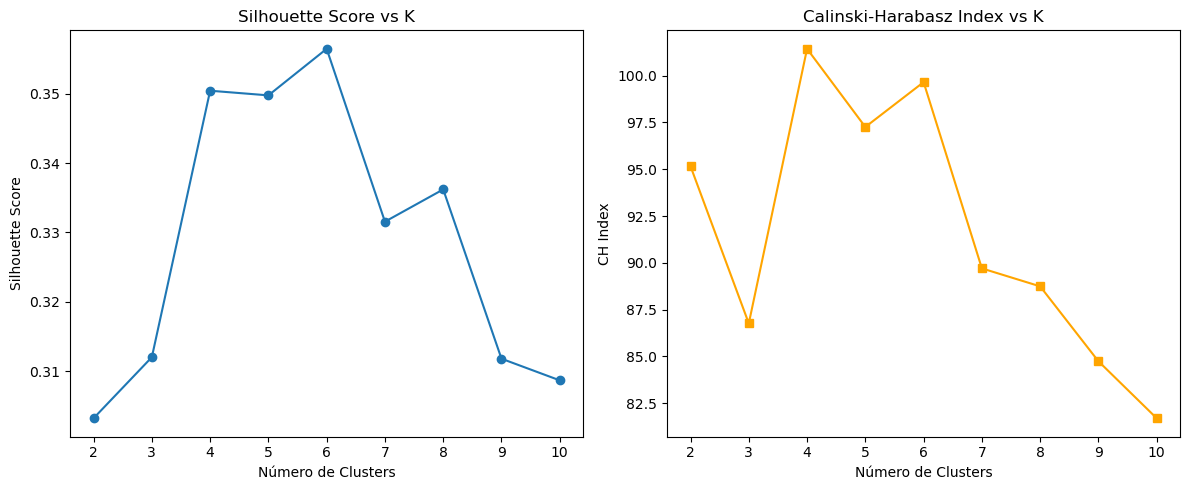

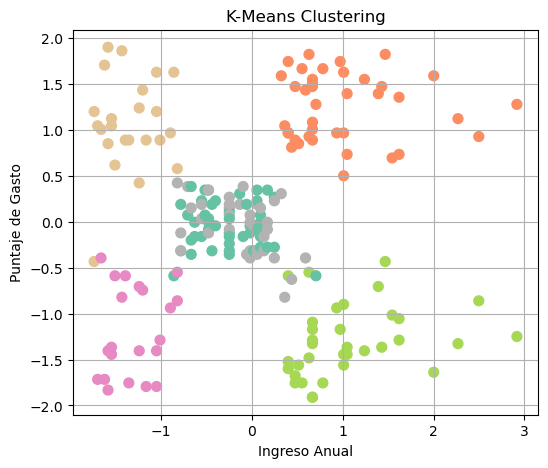

In [50]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(rango_k, puntuaciones_sil, marker='o')
plt.title("Silhouette Score vs K")
plt.xlabel("Número de Clusters")
plt.ylabel("Silhouette Score")

plt.subplot(1, 2, 2)
plt.plot(rango_k, puntuaciones_ch, marker='s', color='orange')
plt.title("Calinski-Harabasz Index vs K")
plt.xlabel("Número de Clusters")
plt.ylabel("CH Index")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(X_seleccionado[:, 1], X_seleccionado[:, 2], c=etiquetas_kmeans, cmap='Set2', s=50)
plt.title("K-Means Clustering")
plt.xlabel("Ingreso Anual")
plt.ylabel("Puntaje de Gasto")
plt.grid(True)
plt.show()




In [49]:
print(f"- El mejor número de clusters según Silhouette es {optimal_k}.")
# K-Means y Clustering Jerárquico muestran agrupaciones similares
# Se identifican grupos con alto ingreso pero bajo gasto, y viceversa
# El análisis puede ayudar a segmentar clientes para marketing personalizado

- El mejor número de clusters según Silhouette es 6.
